In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## A. Data Pre-Processing

In [2]:
# Read and open file.
df_train = pd.read_csv('train.csv')
df_train.head()

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
0,p036502,484aaf11257089a66cfedc9461c6bd0a,Ms.,NV,2016-11-18 14:45:59,Grades PreK-2,Literacy & Language,Literacy,Super Sight Word Centers,Most of my kindergarten students come from low...,I currently have a differentiated sight word c...,NaN,NaN,My students need 6 Ipod Nano's to create and d...,26,1
1,p039565,df72a3ba8089423fa8a94be88060f6ed,Mrs.,GA,2017-04-26 15:57:28,Grades 3-5,"Music & The Arts, Health & Sports","Performing Arts, Team Sports",Keep Calm and Dance On,Our elementary school is a culturally rich sch...,We strive to provide our diverse population of...,NaN,NaN,My students need matching shirts to wear for d...,1,0
2,p233823,a9b876a9252e08a55e3d894150f75ba3,Ms.,UT,2017-01-01 22:57:44,Grades 3-5,"Math & Science, Literacy & Language","Applied Sciences, Literature & Writing",Lets 3Doodle to Learn,Hello;\r\nMy name is Mrs. Brotherton. I teach ...,We are looking to add some 3Doodler to our cla...,NaN,NaN,My students need the 3doodler. We are an SEM s...,5,1
3,p185307,525fdbb6ec7f538a48beebaa0a51b24f,Mr.,NC,2016-08-12 15:42:11,Grades 3-5,Health & Sports,Health & Wellness,"\""Kid Inspired\"" Equipment to Increase Activit...",My students are the greatest students but are ...,"The student's project which is totally \""kid-i...",NaN,NaN,My students need balls and other activity equi...,16,0
4,p013780,a63b5547a7239eae4c1872670848e61a,Mr.,CA,2016-08-06 09:09:11,Grades 6-8,Health & Sports,Health & Wellness,We need clean water for our culinary arts class!,My students are athletes and students who are ...,For some reason in our kitchen the water comes...,NaN,NaN,My students need a water filtration system for...,42,1


In [3]:
# Check shape.
df_train.shape

(182080, 16)

In [4]:
# Check count of unique teacher ids.
df_train.teacher_id.value_counts()

fa2f220b537e8653fb48878ebb38044d    74
df8a4b7ad173b57f7ac52e447cc24043    71
1f64dcec848be8e95c4482cc845706b2    70
ae67d8bbc64ec3bf7fd2db1297721160    58
0d90f689080b0d740a62a51c7f362829    51
062339e2c5ca3b602351bb02ffef9ae4    49
7b17c95da53e3d1f011f84232ad01238    48
4aa921b73a2e523720789ff9b53e6504    48
9f49ba20aa1c28eb95dbad8b8edd2b69    48
613ac392781124be92aecc0d8b251c43    47
d1fe66a662ad4807b33f87d2a12fac8b    47
19f24640d9da49f6f8b4c9938c049591    46
be87a3b5310f15bee9794a636a0929b7    46
cd7400347f6c17ca9c1fdb5adbecbbac    46
b357af898fe06944813be328a2e1335a    45
1be8ff2501f21dbe85a2fc87afb641e8    43
7be1610f23ca55a033b74eedaf7cf694    41
1a8fd309463ad0d6603be484c5f90b1d    41
967180903176eb433b8ab95a0c917201    41
4416745560343f14a74dedcda4ec03b0    41
598b6f5dda5ed11dd4cd6ad8690ed9ae    40
0d7b3cd172c5b19f83a0ed303f46b729    40
a958e1e5342da774ae2c511810767c45    40
26730209ba164d3581dc7257ece69ccb    39
607a99bfff1c1e24386fdb2968fe5c2d    39
bde81494da38940f61e20ba7c

In [5]:
# Create a list of the top 20 teacher ids.
top_20 = df_train.teacher_id.value_counts().index.tolist()[:20]

# Filter the data to reflect the top 20.
df_train_sub = df_train[df_train.teacher_id.isin(top_20)]

# Encode each teacher id for clustering prediction. 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_train_sub['label'] = le.fit_transform(df_train_sub['teacher_id'])

C:\Users\James\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [6]:
# Create a clustering category.
def cat(row):
    if row['label'] >= 16:
        val = 0
    elif (row['label'] >= 12) & (row['label'] < 16):
        val = 1
    elif (row['label'] >= 9) & (row['label'] < 12):
        val = 2
    elif (row['label'] >= 6) & (row['label'] < 9):
        val = 3
    elif (row['label'] >= 3) & (row['label'] < 6):
        val = 4
    else:
        val = 5
    return val

# Create a class feature.
df_train_sub['class'] = df_train_sub.apply(cat, axis=1)

C:\Users\James\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [7]:
# Check for nulls.
df_train_sub.isnull().sum()

id                                                0
teacher_id                                        0
teacher_prefix                                    0
school_state                                      0
project_submitted_datetime                        0
project_grade_category                            0
project_subject_categories                        0
project_subject_subcategories                     0
project_title                                     0
project_essay_1                                   0
project_essay_2                                   0
project_essay_3                                 969
project_essay_4                                 969
project_resource_summary                          0
teacher_number_of_previously_posted_projects      0
project_is_approved                               0
label                                             0
class                                             0
dtype: int64

In [8]:
# Drop unnecessary variables.
df_train_sub = df_train_sub.drop(['project_essay_3', 'project_essay_4'], axis=1)

# Create a feature that combines all applicable texts.
df_train_sub['combined_text'] = df_train_sub['project_title'] + df_train_sub['project_essay_1'] + df_train_sub['project_essay_2'] + df_train_sub['project_resource_summary']

In [9]:
# Use CountVectorizer for the bag of words.
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
cv = CountVectorizer(stop_words='english')

# Set variables.
X = df_train_sub['combined_text']
Y = df_train_sub['teacher_id']
Y_clus = df_train_sub['class']

# Transform the combined texts into a document term matrix.
dtm_train = cv.fit_transform(X)
print(dtm_train.shape)

(1001, 7029)


In [10]:
# Convert to a dataframe.
df_dtm_train = pd.DataFrame(dtm_train.toarray(), columns=cv.get_feature_names())
df_dtm_train.head()

,00,000,00am,00pm,10,100,100cm,10i,11,12,...,ziploc,ziplock,zipper,zippers,zips,zone,zones,zoo,zoos,zumba
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Normalize the features.
from sklearn.preprocessing import normalize
X_norm = normalize(df_dtm_train)

# Reduce to three features for graphing purposes.
from sklearn.decomposition import PCA
X_pca = PCA(3).fit_transform(X_norm)

## B. Clusters

### 1. K-Means

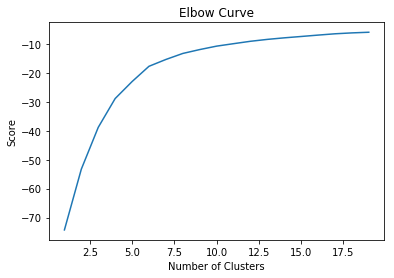

In [12]:
# Determine the optimum number of clusters.
from sklearn.cluster import KMeans
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(X_pca).score(X_pca) for i in range(len(kmeans))]

import pylab as pl
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

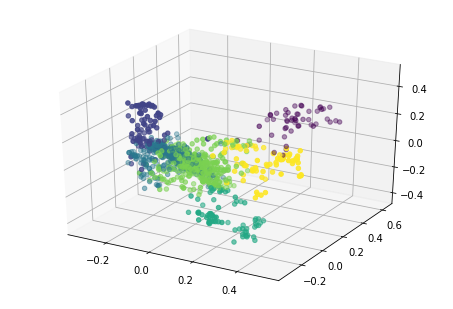

             precision    recall  f1-score   support

          0       0.00      0.00      0.00       238
          1       0.00      0.00      0.00       197
          2       0.17      0.43      0.24       130
          3       0.50      0.26      0.34       136
          4       0.23      0.56      0.33       154
          5       0.65      0.34      0.44       146

avg / total       0.22      0.23      0.19      1001



In [13]:
# Calculate predicted values.
fit_kmeans = KMeans(n_clusters=6, random_state=123).fit(X_pca)
pred_kmeans = fit_kmeans.predict(X_pca)

# Plot in 3D.
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_pca[:, 0], X_pca[:, 1],  X_pca[:, 2], c=pred_kmeans)
plt.show()

# Run classification report.
from sklearn.metrics import classification_report
print(classification_report(Y_clus, pred_kmeans))

### 2. Mean Shift

In [14]:
# Set bandwidth.
from sklearn.cluster import MeanShift, estimate_bandwidth
bandwidth = estimate_bandwidth(X_pca, quantile=0.5)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
pred_ms = ms.fit_predict(X_pca)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 2


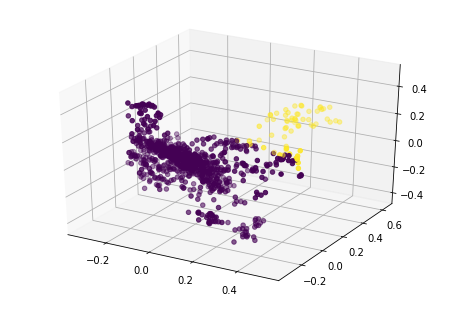

             precision    recall  f1-score   support

          0       0.25      1.00      0.41       238
          1       0.14      0.05      0.07       197
          2       0.00      0.00      0.00       130
          3       0.00      0.00      0.00       136
          4       0.00      0.00      0.00       154
          5       0.00      0.00      0.00       146

avg / total       0.09      0.25      0.11      1001



C:\Users\James\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [15]:
# Plot in 3D.
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels)
plt.show()

# Run classification report.
print(classification_report(Y_clus, pred_ms))

### 3. Spectral

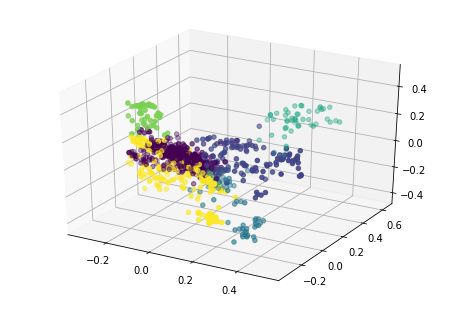

             precision    recall  f1-score   support

          0       0.15      0.32      0.21       238
          1       0.14      0.09      0.11       197
          2       0.01      0.01      0.01       130
          3       0.00      0.00      0.00       136
          4       0.00      0.00      0.00       154
          5       0.00      0.01      0.01       146

avg / total       0.07      0.09      0.07      1001



In [16]:
from sklearn.cluster import SpectralClustering
sc = SpectralClustering(n_clusters=6)

#Predicted clusters.
pred_sc = sc.fit_predict(X_pca)

#Graph results.
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=pred_sc)
plt.show()

# Run classification report.
print(classification_report(Y_clus, pred_sc))

## C. Models

In [17]:
# Train, test split the data before passing through CountVectorizer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4)

### 1. CountVectorizer

In [18]:
# Use pipeline to vectorize the train set and apply the results and run the model on the test set.
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
svc = LinearSVC()
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn import ensemble
gbc = ensemble.GradientBoostingClassifier()

# Use a for-loop to run the pipeline on all four models.
classifiers = [svc, mnb, lr, gbc]
cv = CountVectorizer(stop_words='english')
for clf in classifiers:
    pipe_cv = Pipeline([('cv', cv), ('clf', clf)])
    pipe_cv.fit(X_train, y_train)
    print(clf,'Test Score: ', pipe_cv.score(X_test, y_test),'\n')
    print(clf, 'CV Scores:', cross_val_score(pipe_cv, X, Y, cv=5),'\n')

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0) Test Score:  0.997506234414 

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0) CV Scores: [ 1.          0.99009901  1.          1.          1.        ] 

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) Test Score:  0.997506234414 

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) CV Scores: [ 0.99526066  0.99009901  1.          0.99487179  1.        ] 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbos

### 2. Tfidf Vectorizer

In [19]:
tv = TfidfVectorizer(max_df=0.5, min_df=2, stop_words='english', lowercase=True, use_idf=True)
for clf in classifiers:
    pipe_tv = Pipeline([('cv', tv), ('clf', clf)])
    pipe_tv.fit(X_train, y_train)
    print(clf,'Test Score: ', pipe_tv.score(X_test, y_test),'\n')
    print(clf, 'CV Scores:', cross_val_score(pipe_tv, X, Y, cv=5),'\n')

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0) Test Score:  0.997506234414 

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0) CV Scores: [ 1.  1.  1.  1.  1.] 

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) Test Score:  0.977556109726 

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) CV Scores: [ 0.98578199  0.97524752  0.98        0.99487179  0.99481865] 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) Test Score:  0.99

## D. Holdout

In [20]:
# Pre-process the test holdout.
df_test = pd.read_csv('test.csv')
df_test_sub = df_test[df_test.teacher_id.isin(top_20)]
df_test_sub = df_test_sub.drop(['project_essay_3', 'project_essay_4'], axis=1)
df_test_sub['label'] = le.fit_transform(df_test_sub['teacher_id'])
df_test_sub['class'] = df_test_sub.apply(cat, axis=1)
df_test_sub['combined_text'] = df_test_sub['project_title'] + df_test_sub['project_essay_1'] + df_test_sub['project_essay_2'] + df_test_sub['project_resource_summary']
df_test_sub.head()

C:\Users\James\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_resource_summary,teacher_number_of_previously_posted_projects,label,class,combined_text
355,p033095,d1fe66a662ad4807b33f87d2a12fac8b,Mr.,NJ,2016-04-29 22:25:23,Grades 9-12,"Math & Science, Special Needs","Applied Sciences, Special Needs",Lego Mind Storms Project,In my class of Multiple Disabled students in C...,Camden is the poorest and one of the most dang...,My students need 2 Lego Mindstorm Kits to inte...,14,17,0,Lego Mind Storms ProjectIn my class of Multipl...
714,p094617,1f64dcec848be8e95c4482cc845706b2,Mrs.,CA,2016-05-25 17:52:46,Grades PreK-2,Math & Science,"Applied Sciences, Environmental Science","\""Push and Pull\"" Our Way Through 2nd Grade",My students are incredible! I have 24 motivate...,In 2nd grade we study the motion of objects an...,My students need 5 books on motion and a book ...,234,5,4,"\""Push and Pull\"" Our Way Through 2nd GradeMy ..."
1085,p142700,d1fe66a662ad4807b33f87d2a12fac8b,Mr.,NJ,2016-05-26 14:25:17,Grades 9-12,"History & Civics, Special Needs","History & Geography, Special Needs",Reading and Technology Integration For Special...,Remember reading that first book that helped y...,Technological literacy is essential if our stu...,My students need who was and what was series b...,24,17,0,Reading and Technology Integration For Special...
1153,p129276,4416745560343f14a74dedcda4ec03b0,Ms.,PA,2016-05-29 23:09:10,Grades PreK-2,"Math & Science, Health & Sports","Health & Life Science, Health & Wellness",Organization IS Key!,"Lively, energetic, and kind are three words I...",Our school lacks basic supplies to keep us all...,"My students need activity chests, dry erase po...",68,6,3,"Organization IS Key!Lively, energetic, and ki..."
1196,p220758,0d90f689080b0d740a62a51c7f362829,Mr.,NC,2016-05-16 21:19:20,Grades 9-12,Math & Science,"Applied Sciences, Mathematics",Empowering Students Through Art in STEM,"\""You have brains in your head. You have feet ...",60% of the students at our school receive free...,"My students need 4 fire tablets, 5 chromebooks...",121,1,5,"Empowering Students Through Art in STEM\""You h..."


In [21]:
# Set variables.
X_ttest = df_test_sub['combined_text']
Y_ttest = df_test_sub['teacher_id']
Y_ttest_clus = df_test_sub['class']

# Transform and normalize.
dtm_test = cv.fit_transform(X_ttest)
df_dtm_test = pd.DataFrame(dtm_test.toarray(), columns=cv.get_feature_names())
X_norm_test = normalize(df_dtm_test)
X_pca_test = PCA(3).fit_transform(X_norm_test)

### 1. Clusters

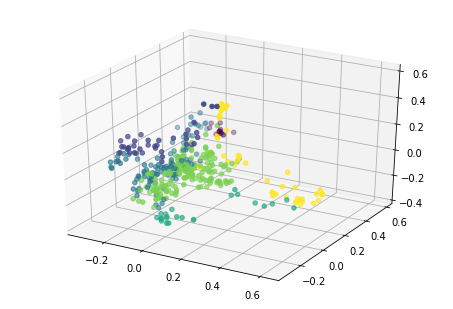

             precision    recall  f1-score   support

          0       1.00      0.13      0.23       107
          1       0.03      0.01      0.02        77
          2       0.21      0.57      0.31        37
          3       0.09      0.04      0.06        47
          4       0.17      0.52      0.26        54
          5       0.59      0.42      0.49        62

avg / total       0.43      0.24      0.22       384



In [22]:
# Predict the test set using the fitted train set.
pred_kmeans_test = fit_kmeans.predict(X_pca_test)

# Plot in 3D.
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_pca_test[:, 0], X_pca_test[:, 1],  X_pca_test[:, 2], c=pred_kmeans_test)
plt.show()

# Run classification report.
print(classification_report(Y_ttest_clus, pred_kmeans_test))

### 2. Models

#### a. CountVectorizer

In [23]:
for clf in classifiers:
    pipe_cv = Pipeline([('cv', cv), ('clf', clf)])
    pipe_cv.fit(X_train, y_train)
    print(clf,'Test Score: ', pipe_cv.score(X_ttest, Y_ttest),'\n')

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0) Test Score:  1.0 

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) Test Score:  1.0 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) Test Score:  1.0 

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_sta

#### b. Tfidf Vectorizer

In [24]:
for clf in classifiers:
    pipe_tv = Pipeline([('cv', tv), ('clf', clf)])
    pipe_tv.fit(X_train, y_train)
    print(clf,'Test Score: ', pipe_tv.score(X_ttest, Y_ttest),'\n')

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0) Test Score:  1.0 

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) Test Score:  0.984375 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) Test Score:  0.997395833333 

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='a

The models performed better than the clustering techniques.